In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold

dataset analysis to check for the need for data pre-processing

In [2]:
data = pd.read_csv("dataset/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


the data is free of NULL values

In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
print("Total number of duplicate rows: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Total number of duplicate rows: ", data.duplicated().sum())

Total number of duplicate rows:  125
Total number of duplicate rows:  0


In [6]:
target="Revenue"
categorical_features=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]

Encoding the categorical feautures

In [7]:
encoder = OneHotEncoder()
for feature in categorical_features:
    onehotarray = encoder.fit_transform(data[[feature]]).toarray()
    items = [f'{feature}_{item}' for item in encoder.categories_[0]]
    data[items] = onehotarray
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#sb.pairplot(data, hue='Revenue', height=4)

In [9]:
data=data.drop(categorical_features, axis=1)
features=list(data.columns)
features.remove(target)
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_1',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',


In [10]:
# We can extract the data in this format from pandas like this:
all_inputs = data[features].values

# Similarly, we can extract the class labels
all_labels = data[target].values





In [11]:
def trainingAndPredictions(Algorithm, X_train, X_test, y_train, y_test):
    Algorithm.fit(X_train, y_train)
    y_pred = Algorithm.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
def trainingAndPredictionsWithKFold(Algorithm):
    kf = KFold(n_splits=10)
    predictions = []
    
    for train_index, test_index in kf.split(all_inputs, all_labels):
        # Split the data into training and testing sets
        X_train, X_test = all_inputs[train_index], all_inputs[test_index]
        y_train, y_test = all_labels[train_index], all_labels[test_index]
        Algorithm.fit(X_train, y_train)
        predictions.append(Algorithm.predict(X_test))
        
    all_predictions = np.concatenate(predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
def trainingRepetitions(Algorithm):
    model_accuracies = []
    for repetition in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.2, random_state=repetition)
        Algorithm.fit(X_train, y_train)
        accuracy = Algorithm.score(X_test, y_test)
        model_accuracies.append(accuracy)

    plt.hist(model_accuracies)

def splitData():
    X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test

    

DECISION TREE

Accuracy: 0.8968455551003687
Precision: 0.690099589923843
Recall: 0.6174004192872118
F1 Score: 0.6517289073305672


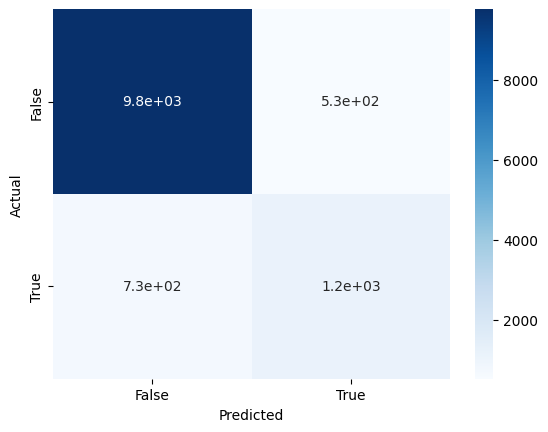

In [12]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy', splitter='best')
trainingAndPredictionsWithKFold(decision_tree_classifier)


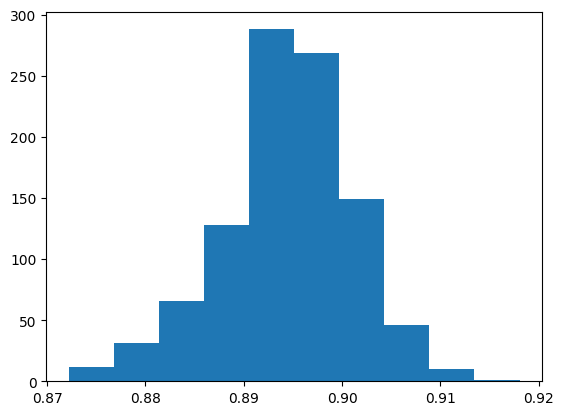

In [13]:
trainingRepetitions(DecisionTreeClassifier(max_depth=3, criterion='entropy', splitter='best'))


In [16]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15,'auto', 'sqrt', 'log2', None]
    }


cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

Best score: 0.8948743303661336
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
with open('dtc_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    
from subprocess import check_call
check_call(['dot','-Tpng','dtc_tree.dot','-o','dtc_tree.png'])

<img src="dtc_tree.png"/>

Accuracy: 0.8653011061040558
Precision: 0.7538461538461538
Recall: 0.20545073375262055
F1 Score: 0.32289950576606263


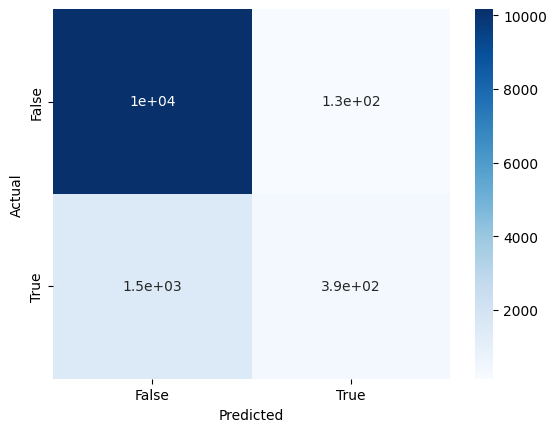

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=14)
trainingAndPredictionsWithKFold(knn_classifier)

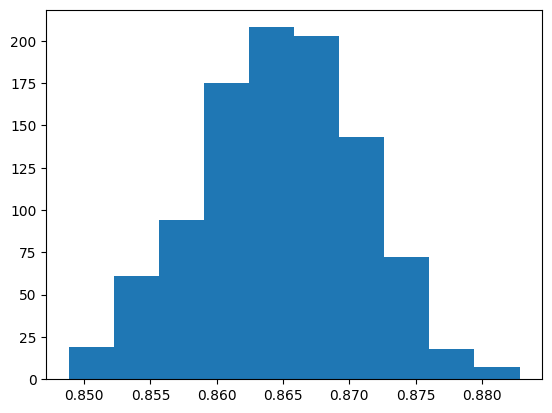

In [ ]:
trainingRepetitions(KNeighborsClassifier(n_neighbors=14))

In [ ]:
knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier


Best score: 0.8656931297914905
Best parameters: {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=14)